# Capítulo 4 - Objetos de anotação de sequência

No Capítulo 3 (https://github.com/GTL98/biopython_br/tree/main/Cap%203%20-%20Objetos%20de%20Sequ%C3%AAncia) foi introduzida as classes de sequência. "Acima" das classes **Seq** está a classe de Registro de Sequência, ou **SeqRecord**, definida pelo módulo `Bio.SeqRecord`. Essa classe tem ferramentas de nível superior como identificadores e recursos (como os objetos **SeqFeature**) associados a sequência e usado ao longo da interface de entrada/saída do módulo `Bio.SeqIO` (mais detalhes no Capítulo 5: ***link do capítulo 5***).

Se você trabalhará somente com arquivos FASTA, você provavelmente pulará essa parte por agora. Mas se por outro lado você usar arquivos de sequências com ricas anotações, como GenBank ou EMBL, as informações a seguir são de suma importância.

Esse capítulo deverá explicar muitas coisas que os objetos **SeqRecord** e **SeqFeature** podem fazer. Você também está convidado a ler documentação online do objeto **SeqRecord** (https://biopython.org/docs/1.79/api/Bio.SeqRecord.html) e do objeto **SeqFeature** (https://biopython.org/docs/1.79/api/Bio.SeqFeature.html).

Caso tenha alguma dúvida, basta chamar o método **help** do Python:

In [1]:
from Bio.SeqRecord import SeqRecord
help(SeqRecord)

Help on class SeqRecord in module Bio.SeqRecord:

class SeqRecord(builtins.object)
 |  SeqRecord(seq, id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=None, features=None, annotations=None, letter_annotations=None)
 |  
 |  A SeqRecord object holds a sequence and information about it.
 |  
 |  Main attributes:
 |   - id          - Identifier such as a locus tag (string)
 |   - seq         - The sequence itself (Seq object or similar)
 |  
 |  Additional attributes:
 |   - name        - Sequence name, e.g. gene name (string)
 |   - description - Additional text (string)
 |   - dbxrefs     - List of database cross references (list of strings)
 |   - features    - Any (sub)features defined (list of SeqFeature objects)
 |   - annotations - Further information about the whole sequence (dictionary).
 |     Most entries are strings, or lists of strings.
 |   - letter_annotations - Per letter/symbol annotation (restricted
 |     dictionary). This holds Pyt

## 4.1 O objeto SeqRecord

A classe **SeqRecord** é definida pelo módulo `Bio.SeqRecord`. Essa classe possui ferramentas de alto nível, como os identificadores e recursos (ver o Capítulo 3: https://github.com/GTL98/biopython_br/tree/main/Cap%203%20-%20Objetos%20de%20Sequ%C3%AAncia) e é o tipo básico de dado para as sequência de entrada/saída do módulo `Bio.SeqIO` (ver o Capítulo 5: ***link do capítulo 5***).

A classe **SeqRecord** é bem simples e fornece as seguintes informações como atributos:
- **.seq**: A sequência por si própria, geralmente um objeto **Seq**;


- **.id**: A identificação primária da sequência (uma string). Na maioria dos casos é um número de acesso;


- **.name**: O nome/identificação "comum" da sequência (uma string). Em alguns casos é o mesmo que o número de acesso, mas também pode ser o nome de um clone. Pode ser análogo a identificação LOCUS em arquivos GenBank;


- **.description**: Uma descrição ou o nome da sequência que o humano consiga ler (uma string);


- **.letter_annotations**: Guarda as anotações por letra usando um restrito dicionário de informações adicionais sobre as letras na sequência. As chaves são o nome das informações e as informações são os valores (i.e. uma tupla, uma lista ou uma string), com o mesmo tamanho da sequência. Esse atributo é frequentemente usado para pontuações de qualidade (ver a **Seção 20.1.6** no Capítulo 20: ***link do capítulo 20***), ou informações da estrutura secundária (e.g. arquivos de alinhamento Stockholm/PFAM);


- **.annotations**: Um dicionário com informações adicionais da sequência. As chaves são o nome da informação e o valor é a informação. Isso permite a adição de informações "não relacionadas" à sequência;


- **.features**: Uma lista de objetos **SeqFeatures** com mais informações relacionadas sobre as características presentes na sequência (e.g. domínios em uma proteína ou posição dos genes em um genoma). A estrutura dos recursos da sequência serão melhores detalhadas na **Seção 4.3** e;


- **.dbxrefs**: Uma lista de referências cruzadas de bancos de dados como strings.

## 4.2 Criando o SeqRecord

Usar o objeto **SeqRecord** não é muito complicado, uma vez que as informações são apresentadas como atributos da classe. Normalmente você não precisará criar um objeto **SeqRecord** "na mão", mas usará o módulo `Bio.SeqIO` para ler o arquivo de sequência para você (ver os exemplos do Capítulo 5: ***link do capítulo 5***). Entretanto, criar um objeto **SeqRecord** é bem simples:

### 4.2.1 Objetos SeqRecord do zero

Para criar o mínimo necessário do objeto **SeqRecord**, você precisa somente de um objeto **Seq**:

In [2]:
from Bio.Seq import Seq
simples_seq = Seq('GATC')

In [3]:
from Bio.SeqRecord import SeqRecord
simples_seq_r = SeqRecord(simples_seq)

Além disso, você pode informar a identificação, nome e descrição para a função de inicialização. Caso contrário, esas informações serão desconhecidas e podem ser modificadas posteriormente:

In [4]:
simples_seq_r.id

'<unknown id>'

In [5]:
simples_seq_r.id = 'AC12345'
simples_seq_r.description = 'Sequência que eu gostaria de escrever um artigo'

In [6]:
print(simples_seq_r.description)

Sequência que eu gostaria de escrever um artigo


In [7]:
simples_seq_r.seq

Seq('GATC')

Incluir a identificação da sequência é vital se você estiver querendo exportar o objeto **SeqRecord** em um arquivo. Você deve incluir a identificação quando estiver criando o objeto **SeqRecord**:

In [8]:
from Bio.Seq import Seq
simples_seq = Seq('GATC')

In [9]:
from Bio.SeqRecord import SeqRecord
simples_seq_r = SeqRecord(simples_seq, id='AC12345')

Como mencionado mais acima, o objeto **SeqRecord** possui o atributo **annotations** como um dicionário. Ele é usado para qualquer anotação que não se encaixe nos outros atributos mais específicos. Adicinar anotações é fácil e envolve apenas saber como adicionar informações em um dicionário Python:

In [10]:
simples_seq_r.annotations['evidence'] = 'Nenhuma. Acabei de inventar.'

In [11]:
print(simples_seq_r.annotations)

{'evidence': 'Nenhuma. Acabei de inventar.'}


In [12]:
print(simples_seq_r.annotations['evidence'])

Nenhuma. Acabei de inventar.


Trabalhar com anotações por letra segue a mesma lógica. **letter_annotations** é um dicionário Python onde a chave é o nome da informação e o valor é a informação, mas sempre respeitando o tamanho da sequência; nesse exemplo o tamanho é de 4 pares de base, então deverá ter 4 valores de informação:

In [13]:
simples_seq_r.letter_annotations['phred_quality'] = [40, 40, 38, 30]

In [14]:
print(simples_seq_r.letter_annotations)

{'phred_quality': [40, 40, 38, 30]}


In [15]:
print(simples_seq_r.letter_annotations['phred_quality'])

[40, 40, 38, 30]


Os atributos **dbxrefs** e **features** são uma lista Python e deverão ser usados para armazenar stings e objetos **SeqFeature** (discutidos mais a frente nesse capítulo), respectivamente.

### 4.2.2 Objetos SeqRecord de arquivos FASTA

Para essa seção, usaremos um arquivo FASTA que contém o a sequência completa do plasmídeo pPCP1 da bactéria *Yersinia pestis biovar Microtus*, podendo ser baixado pelo NCBI (https://www.ncbi.nlm.nih.gov/nuccore/NC_005816.1) ou no diretório deste mesmo documento no GitHub.

O arquivo deve começar da seguinte maneira (você pode notar que há somente um registro presente, uma única linha após o sinal de maior (>)):

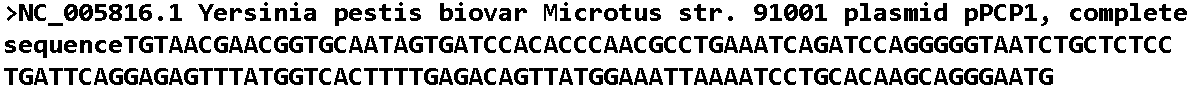 ...

Se precisar, volte ao Capítulo 2 (https://github.com/GTL98/biopython_br/tree/main/Cap%202%20-%20O%20que%20podemos%20fazer%20com%20o%20Biopython) e veja como funciona o `Bio.SeqIO.parse(...)` e o loop para percorrer todos os registros em um arquivo como os objetos **SeqRecords**. O módulo `Bio.SeqIO` possui uma função irmã para uso em arquivos que possuem somente uma linha de registro, como esse que estamos vendo agora:

In [16]:
from Bio import SeqIO
registro = SeqIO.read('NC_005816.1.fna', 'fasta')

In [17]:
registro

SeqRecord(seq=Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG'), id='NC_005816.1', name='NC_005816.1', description='NC_005816.1 Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence', dbxrefs=[])

Agora, vamos olhar os atributos chaves individualmente do objeto **SeqRecord** (começando com o atributo **seq** que retornará um objeto **Seq**):

In [18]:
registro.seq

Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG')

Os identificadores e descrição:

In [19]:
registro.id

'NC_005816.1'

In [20]:
registro.name

'NC_005816.1'

In [21]:
registro.description

'NC_005816.1 Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence'

Observe nenhum dos outros atributos de anotação são preenchidos ao ler um arquivo FASTA:

In [22]:
registro.dbxrefs

[]

In [23]:
registro.annotations

{}

In [24]:
registro.letter_annotations

{}

In [25]:
registro.features

[]

Nesse nosso exemplo, o arquivo FASTA veio do NCBI; que por sua vez possui um conjunto de convenções bem estabelecidas para formatar as linhas de um arquivo FASTA. Porém, os arquivos FASTA de outras fontes variam, o que não torna possível generalizá-lo.

### 4.2.3 Objetos SeqRecord de arquivos GenBank

Na seção anterior, nós vimos a sequência completa do plasmídeo pPCP1 da bactéria *Yersinia pestis biovar Microtus* no formato FASTA, mas agora veremos essa mesma sequência em um arquivo GenBank. De novo, esse arquivo pode ser encontrado online no NCBI (https://www.ncbi.nlm.nih.gov/nuccore/NC_005816.1) ou no mesmo diretório desse documento no GitHub.

O arquivo contém um único registro (i.e. uma linha LOCUS) e começa assim:

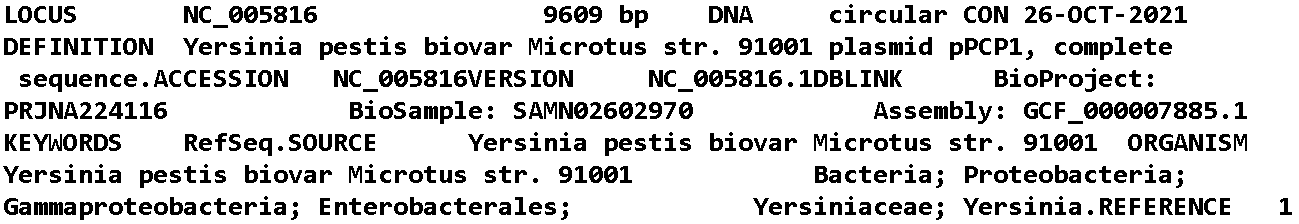

(Desculpe a qualidade de visualização, é que o meu editor de texto não consege formatar as informações de uma maneira bonita).

Novamente, nós usaremos o módulo `Bio.SeqIO` para ler o arquivo. O código é idêntico ao usado com o arquivo FASTA:

In [26]:
from Bio import SeqIO
registro = SeqIO.read('NC_005816.1.gb', 'genbank')

In [27]:
registro

SeqRecord(seq=Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG'), id='NC_005816.1', name='NC_005816', description='Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence', dbxrefs=['BioProject:PRJNA224116', 'BioSample:SAMN02602970', 'Assembly:GCF_000007885.1'])

In [28]:
registro.seq

Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG')

O argumento **name** vem da linha LOCUS, enquanto o argumento **id** inclui o sufixo da versão. A descrição vem da linha DEFINITION:

In [29]:
registro.id

'NC_005816.1'

In [30]:
registro.name

'NC_005816'

In [31]:
registro.description

'Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence'

Assim como o arquivo FASTA, o arquivo GenBank não vem com anotações por letra:

In [32]:
registro.letter_annotations

{}

Muitas informações estão registradas no argumento **annotations**, por exemplo:

In [33]:
len(registro.annotations)

13

In [34]:
registro.annotations['source']

'Yersinia pestis biovar Microtus str. 91001'

O argumento **dbxrefs**:

In [35]:
registro.dbxrefs

['BioProject:PRJNA224116',
 'BioSample:SAMN02602970',
 'Assembly:GCF_000007885.1']

Por último, mas não menos importante (se não o mais interessante), são as entradas da tabela de recursos (e.g. características da CDS ou dos genes) que possuem os registros como objetos **SeqFeature** no argumento **features**:

In [36]:
len(registro.features)

19

Falaremos do objeto **SeqFeature** na próxima seção.

## 4.3 Objetos de característica, localização e posição

### 4.3.1 Objetos SeqFeature

As características das sequências são essenciais para descrevê-las. Depois de você analisar além da sequência em si, você necessita alguma maneira de organizar e obter um resumo fácil das informações conhecidas dessa sequência. Enquanto provavelmente é impossível desenvolver uma classe de recurso que generalize bem, a classe **SeqFeature** do Bipython tenta encapsular o máximo de informação possível da sequência. Essa classe foi desenhada com base nas tabelas de recursos do GenBank e EMBL, então caso você entenda como elas funcionam, você certamente terá mais facilidade em compreender a estrutura das classe do Biopython.

A ideia por trás o objeto **SeqFeature** é descrever uma região em uma determinada sequência pai, normalmente um objeto **SeqRecord**. A região é descrita com um objeto de localização, geralmente um intervalo entre duas posições (ver a **Seção 4.3.2**).

A classe **SeqFeature** possui alguns atributos, vamos olhar o que cada um faz agora e depois veremos como usá-los em exemplos da vida real. Os atributos de **SeqFeatures** são:

- **.type**: É uma descrição textual do tipo da característica (como 'CDS' ou 'gene');


- **.location**: A localização de um objeto **SeqFeature** na sequência que você está lidando. **SeqFeature** delega mais funcionalidades para o local selecionado, e inclui alguns atributos para analisar as propriedades da região selecionada:
    - **.ref**: Abreviação para **.location.ref**. Qualquer sequência de referência (diferente) à qual o local está se referindo. Geralmente tem valor *None*;
    - **.ref_db**: Abreviação para **.location.ref_db**. Especifíca o banco de dados o identificador usado em **.ref**. Geralmente tem o valor *None* e;
    - **.strand**: Abreviação para **.location.strand**. A fita na sequência em que a característica está localizada. Para uma sequência de fita dupla, pode ser o valor 1 para a fita superior, -1 para a inferior, 0 se a fita é importante mas desconhecida e *None* se isso não tem importância. O valor *None* é usado para proteínas o sequências de fita simples.
    

- **.qualifiers**: É um dicionário Python com informações adicionais sobre o recurso. A chave do dicionário é a descrição da característica em uma palavra e o valor é a informação dessa característica. Por exemplo, uma chave bem comum é a "evidence" e o valor é "(comptational (non-experimental)". Esse é apenas uma maneira de permitir que a pessoa que esteja olhando esse recurso saiba que ainda não foram feitos testes laboratoriais. Observe que o outro valor será uma lista de strings (onde há uma única string no exemplo). Isso é um reflexo das tabelas de características dos arquivos GenBank e EMBL e;


- **.sub_features**: Esse argumento é usaod para representar características que são complicadas de localizar, como 'joins' em arquivos GenBank e EMBL. Esse argumento foi descontinuado com a introdução do objeto **CompundLocation**, então podemos ignorá-lo.

### 4.3.2 Posições e localizações

A ideia por trás da classe **SeqFeature** é descrever uma região da sequência pai, para isso nós usamos o objeto de localização, normalmente descrevendo o intervalo entre duas posições. Para deixar mais claro as terminologias, usaremos:

- **posição**: Refere-se a posição na sequência, que pode ser confuso ou não. Por exemplo: 5, 20, <100 e >200 são todas posições e;


- **localização**: A locarlização é uma região da sequência limitada por algumas posições. Por exemplo: 5..20 (i.e. 5 até 20) é uma localização.

E sim, no começo é meio confuso e você certamente retornará aqui para esclarecer as dúvidas.

#### 4.3.2.1 Objeto FeatureLocation

A não ser que você trabalhe com sequências genéticas de eucariotos, as localizações de **SeqFeature** são bem simples: você deve começar com um ponto de partida e chegada e uma fita. Isso é basicamente o que o objeto **FeatureLocation** faz.

No mundo real, com certeza, as coisas podem ser um pouco mais complicadas. Primeiro, nós devemos lidar com os locais compostos formados por várias regiões. Segundo, as posições próprias posições podem ser confusas (sem exatidão).

#### 4.3.2.2 Objeto CompoundLocation

Na versão 1.62 do Biopython foi introduzdo o **CompoundLocation** como parte para reestruturar como os locais complexos compostos por várias regiões são representados. Seu principal uso é em locais 'join' em arquivos GenBank e EMBL.

#### 4.3.2.3 Posições confusas

Até agora nós usamos posições simples. Uma complicação de lidar com as caracterísicas dos locais está na própia posição. Na biologia, muitas vezes as coisas não são totalmente certas. Por exemplo, você quer fazer um experimento com primers e descobre qe o começo da transcrição do mRNA ocorre em um dos dois sítios. Isso é ma informação sem função útil, mas complicação vem na hora de representar essa posição. Para nos ajudar com isso, temos o conceito de posições confusas. Basicamente há diversos tipode de posições confusas, logo o Biopython dispõede 5 classes para lidar com isso:

- **ExactPosition**: Como o nome sgere, essa classe representa a posição que é especificada como exata ao longo da sequência. É representada por um número e você consegue esse valor olhando o atributo **position** do objeto;


- **BeforePosition**: Essa classe representa a posição confusa que ocorre antes do sítio especificado. Na notação de arquivos GenBank e EMBL, essa representaão é algo como '<13', siginificando que a posição real está abaixo de 13. Para obter o valor superior ao especificado, olhe o atributo **position** do objeto;


- **AfterPosition**: Ao contrário da **BeforePosition**, esta classe representa a posição que ocorre após o sítio especificado. É representado em arquivos GenBank como '>13', e igaul ao **BeforePositio**, você obtém o valor limite olhando o atributo **position** do objeto;


- **WithinPosition**: Ocasionalmente usado em localizações dos arquivos GenBank e EMBL, esta classe modela uma posição que ocorre entre dois nucleotídeos especificados. Na notação do GenBank e EMBL, isso seria representado como '(1.5)', ou seja, a posição está entre 1 e 5. Para obter a infomação nessa classe, você tem que olhar para dois atributos. O atributo **position** especiica o limite inferior do intervalo que estamos procurando, que no nosso exemplo é 1. O atributo **extension** especifica o limite superior do intervalo, que no caso será o 4. Então, o **object.position** é o limite inferior e o **object.position + object.extension** é o limite superior;


- **OneOfPosition**: Ocasionalmente em localizações dos arquivos GenBank e EMBL, esta classe lida com uma posição onde há vários valores possíveis. Por exemplo, você pode usar se o códon de inicío não está claro e possui dois candidatos para essa vaga. Alternativamente, pode ser tratado explicitamente como duas caraterísticas genéticas relacionadas e;


- **UnknownPosition**: Essa classe lida com uma posição de localização desconhecida. Isso não é usado em arquivos do GenBank e EMBL, mas corresponde ao caractere "?" usado no UniProt.

Abaixo segue um exemplo de localização com os pontos confusos:

In [37]:
from Bio import SeqFeature
posicao_comeco = SeqFeature.AfterPosition(5)
posicao_final = SeqFeature.BetweenPosition(9, left=8, right=9)
minha_localizacao = SeqFeature.FeatureLocation(posicao_comeco, posicao_final)

Observe que os dedatlhes da localizações confusas mudaram na versão 1.59 do Biopython, em particlar as classes **BetweenPosition** e **WithinPosition** onde devemos deixar explícito a posição usada para o fatiamento. Para a posição inicial geralmente é usado um valor no parâmetro **left**, enquanto para o final o valor vai no parâmetro **right** (sempre um valor maior do que o que vai no **left**).

Se você quiser mostrar o objeto **FeatureLocation**, basta chamá-lo dentro de um **print**:

In [38]:
print(minha_localizacao)

[>5:(8^9)]


Você pode acessar a posição inicial e final usando os astributos **start** e **end**, respectivamente, na localização:

In [39]:
minha_localizacao.start

AfterPosition(5)

In [40]:
print(minha_localizacao.start)

>5


In [41]:
minha_localizacao.end

BetweenPosition(9, left=8, right=9)

In [42]:
print(minha_localizacao.end)

(8^9)


Se você não quiser que retorne uma posição confusa mas sim somente os números, pode usar a classe **int**:

In [43]:
int(minha_localizacao.start)

5

In [44]:
int(minha_localizacao.end)

9

Para a compatibilidade com as versões mais antigas do Biopython, você pode usar os argumentos **nofuzzy_start** e **nofuzzy_end** para as localizações serem retornadas como inteiros:

In [45]:
minha_localizacao.nofuzzy_start

5

In [46]:
minha_localizacao.nofuzzy_end

9

Observe que isso apenas retorna a posição das localizações.

De maneira análoga, é fácil criar uma posição sem se importar com as posições confusas. Você pode apenas passar em números para o **FeaturePosition** e será retornado os objetos **ExactPosition**:

In [47]:
posicao_exata = SeqFeature.FeatureLocation(5, 9)

In [48]:
print(posicao_exata)

[5:9]


In [49]:
posicao_exata.start

ExactPosition(5)

In [50]:
int(posicao_exata.start)

5

In [51]:
posicao_exata.nofuzzy_start

5

Essa é a maior parte das questões essênciais sobre as posições confusas em Biopython. Esse mecanismo foi desenhado para lidar de uma maneira não muito complicada em comparação com as posições exatas.

#### 4.3.2.4 Teste de localização

Você pode usar a palavra reservada **in** com o **SeqFeature** ou a localização do objeto para ver se uma base/resíduo para uma coordenada pai está presente no recurso/localização ou não.

Por exemplo, vamos supor que você tem um SNP de interesse e gostaria de saber as características desse SNP. Vamos supor que esse SNP esteja na posição 4350 (lembre-se que o Python começa a contar a partir do 0). Abaixo está uma maneira simples de solução usando a força bruta, onde é checado todas as características em um loop:

In [52]:
from Bio import SeqIO
meu_snp = 4390
registro = SeqIO.read('NC_005816.1.gb', 'genbank')
for caracteristica in registro.features:
    if meu_snp in caracteristica:
        print(caracteristica.type, caracteristica.qualifiers.get('db_xref'))

source ['taxon:229193']
gene None
CDS None


### 4.3.3 Sequência descrita por uma característica ou localização

**pag 40**